In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [36]:
def read_cnf_atoms ( filename, with_v=False ):
    """Read in atomic configuration."""
    
    import numpy as np
    
    with open(filename,"r") as f:
        n=int(f.readline()) # Number of atoms
        box=float(f.readline()) # Simulation box length (assumed cubic)
    rv=np.loadtxt(filename,skiprows=2) # The rest of the file should be uniformly formatted
    rows, cols = rv.shape
    assert rows == n, "{:d}{}{:d}".format(rows,' rows not equal to ',n)
    assert cols >= 3, "{:d}{}".format(cols,' cols less than 3')
    r = rv[:,0:3].astype(np.float_) # Coordinate array
    if with_v:
        assert cols >= 6, "{:d}{}".format(cols,' cols less than 6')
        v = rv[:,3:6].astype(np.float_) # Velocity array
        return n, box, r, v
    else:
        return n, box, r

In [37]:
n, box, r, v = read_cnf_atoms ("cnf.out", with_v=True)

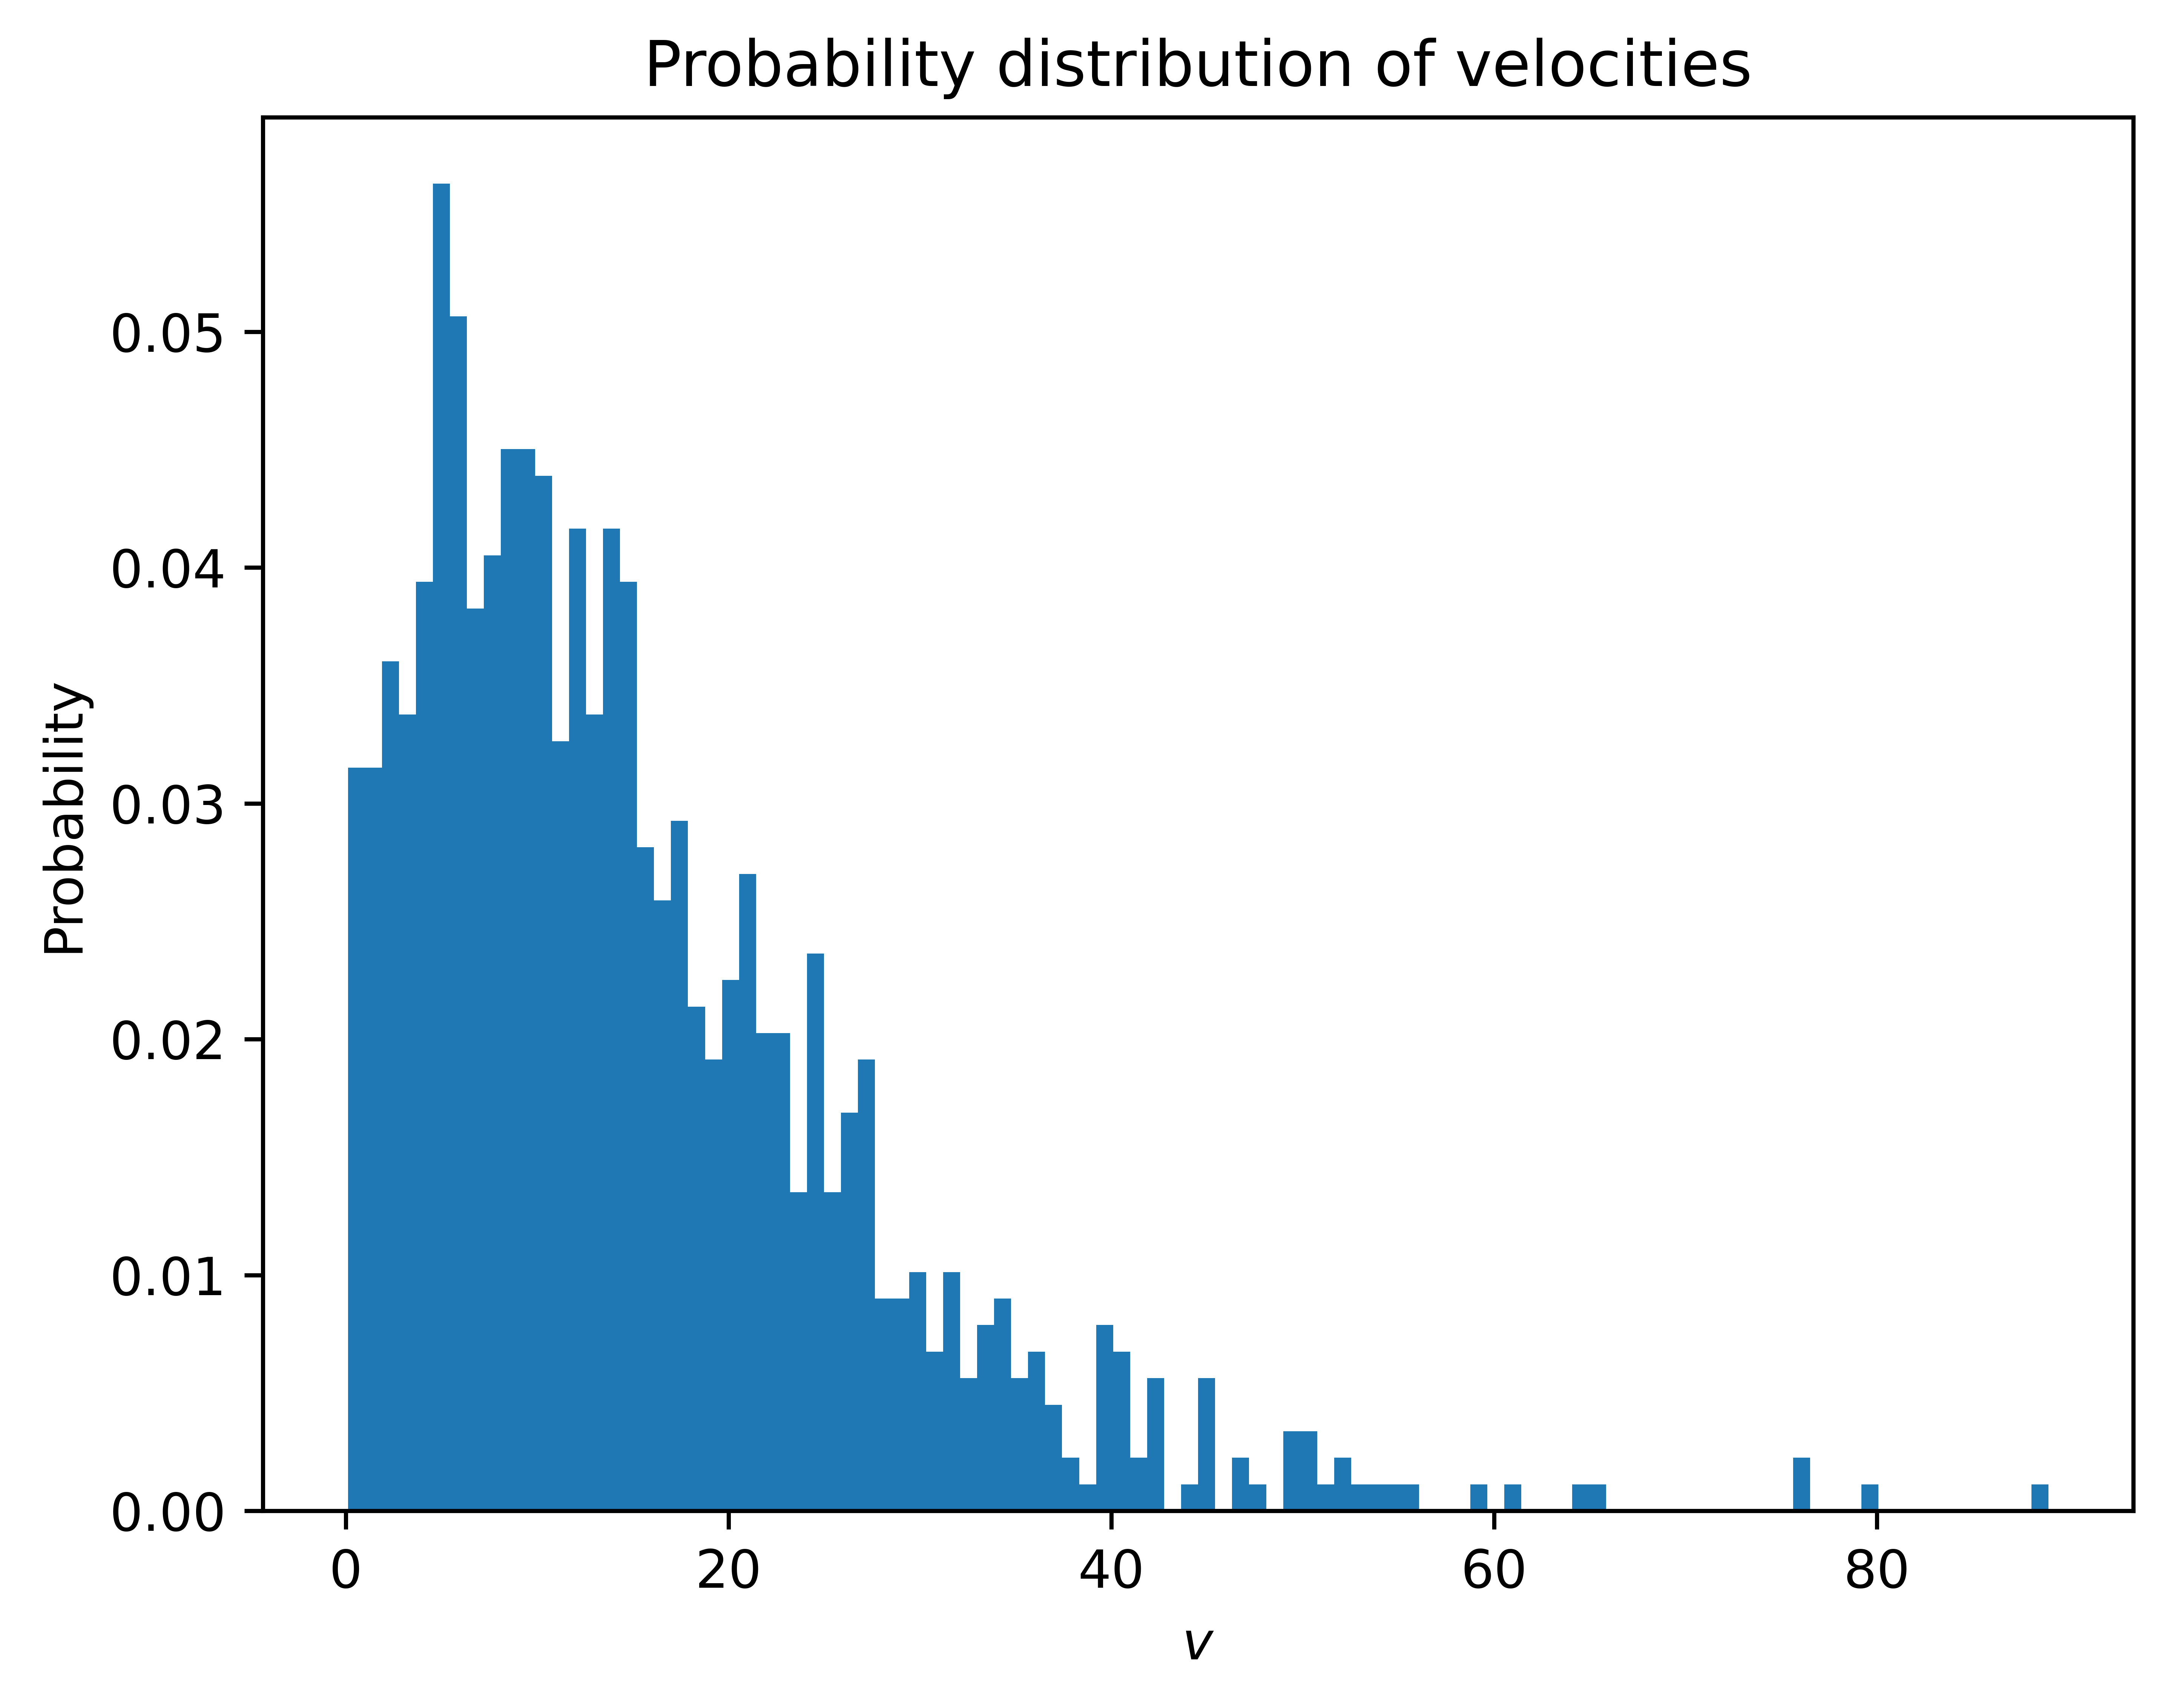

In [66]:
n, box, r, v = read_cnf_atoms ("cnf.out", with_v=True)
v_sq = (v[:,0]**2)+(v[:,1]**2)+(v[:,2]**2)
plt.figure(dpi=1000)
plt.hist(v_sq,bins=100, density=True, label='v')
plt.xlabel('$v$')
plt.ylabel('Probability')
plt.title("Probability distribution of velocities")
plt.savefig('MEstAv - Proyecto (10000 partículas) - 1.png')
plt.show()

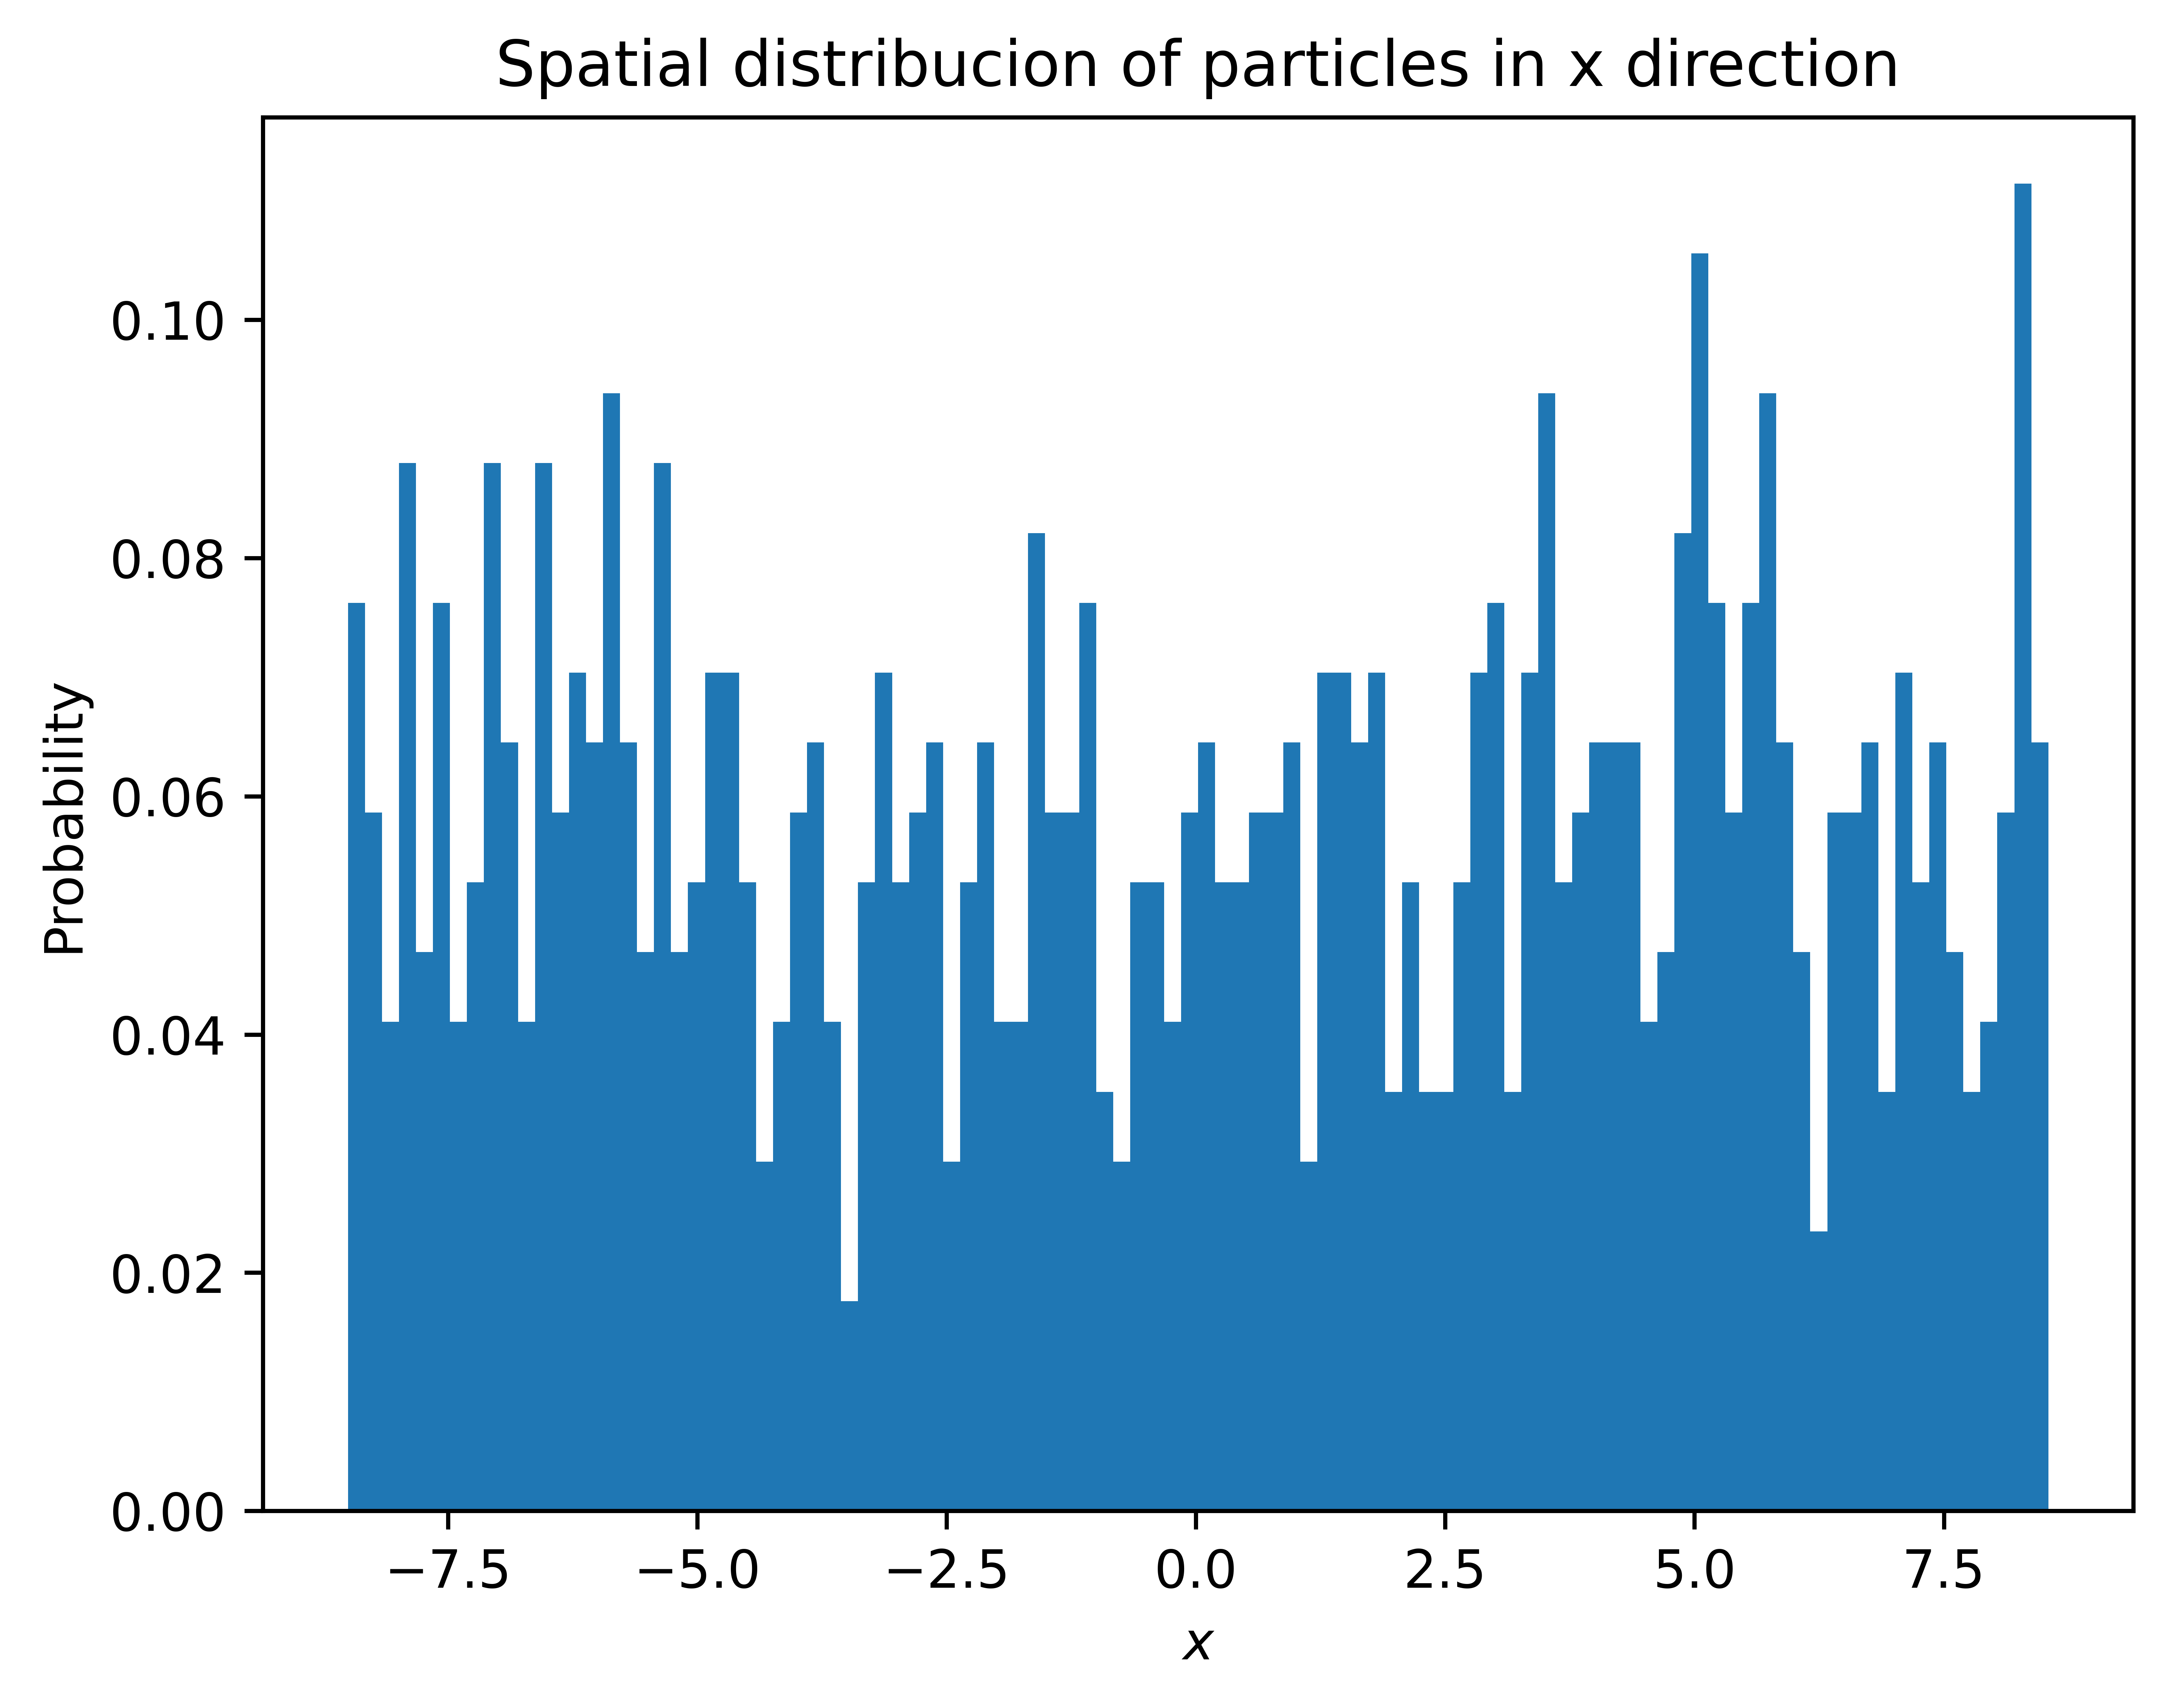

In [63]:
plt.figure(dpi=1000)
plt.hist(r[:,0], density=True, label='v',bins=100)
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.title('Spatial distribucion of particles in x direction')
plt.savefig('MEstAv - Proyecto (10000 partículas) - 2.png')
plt.show()

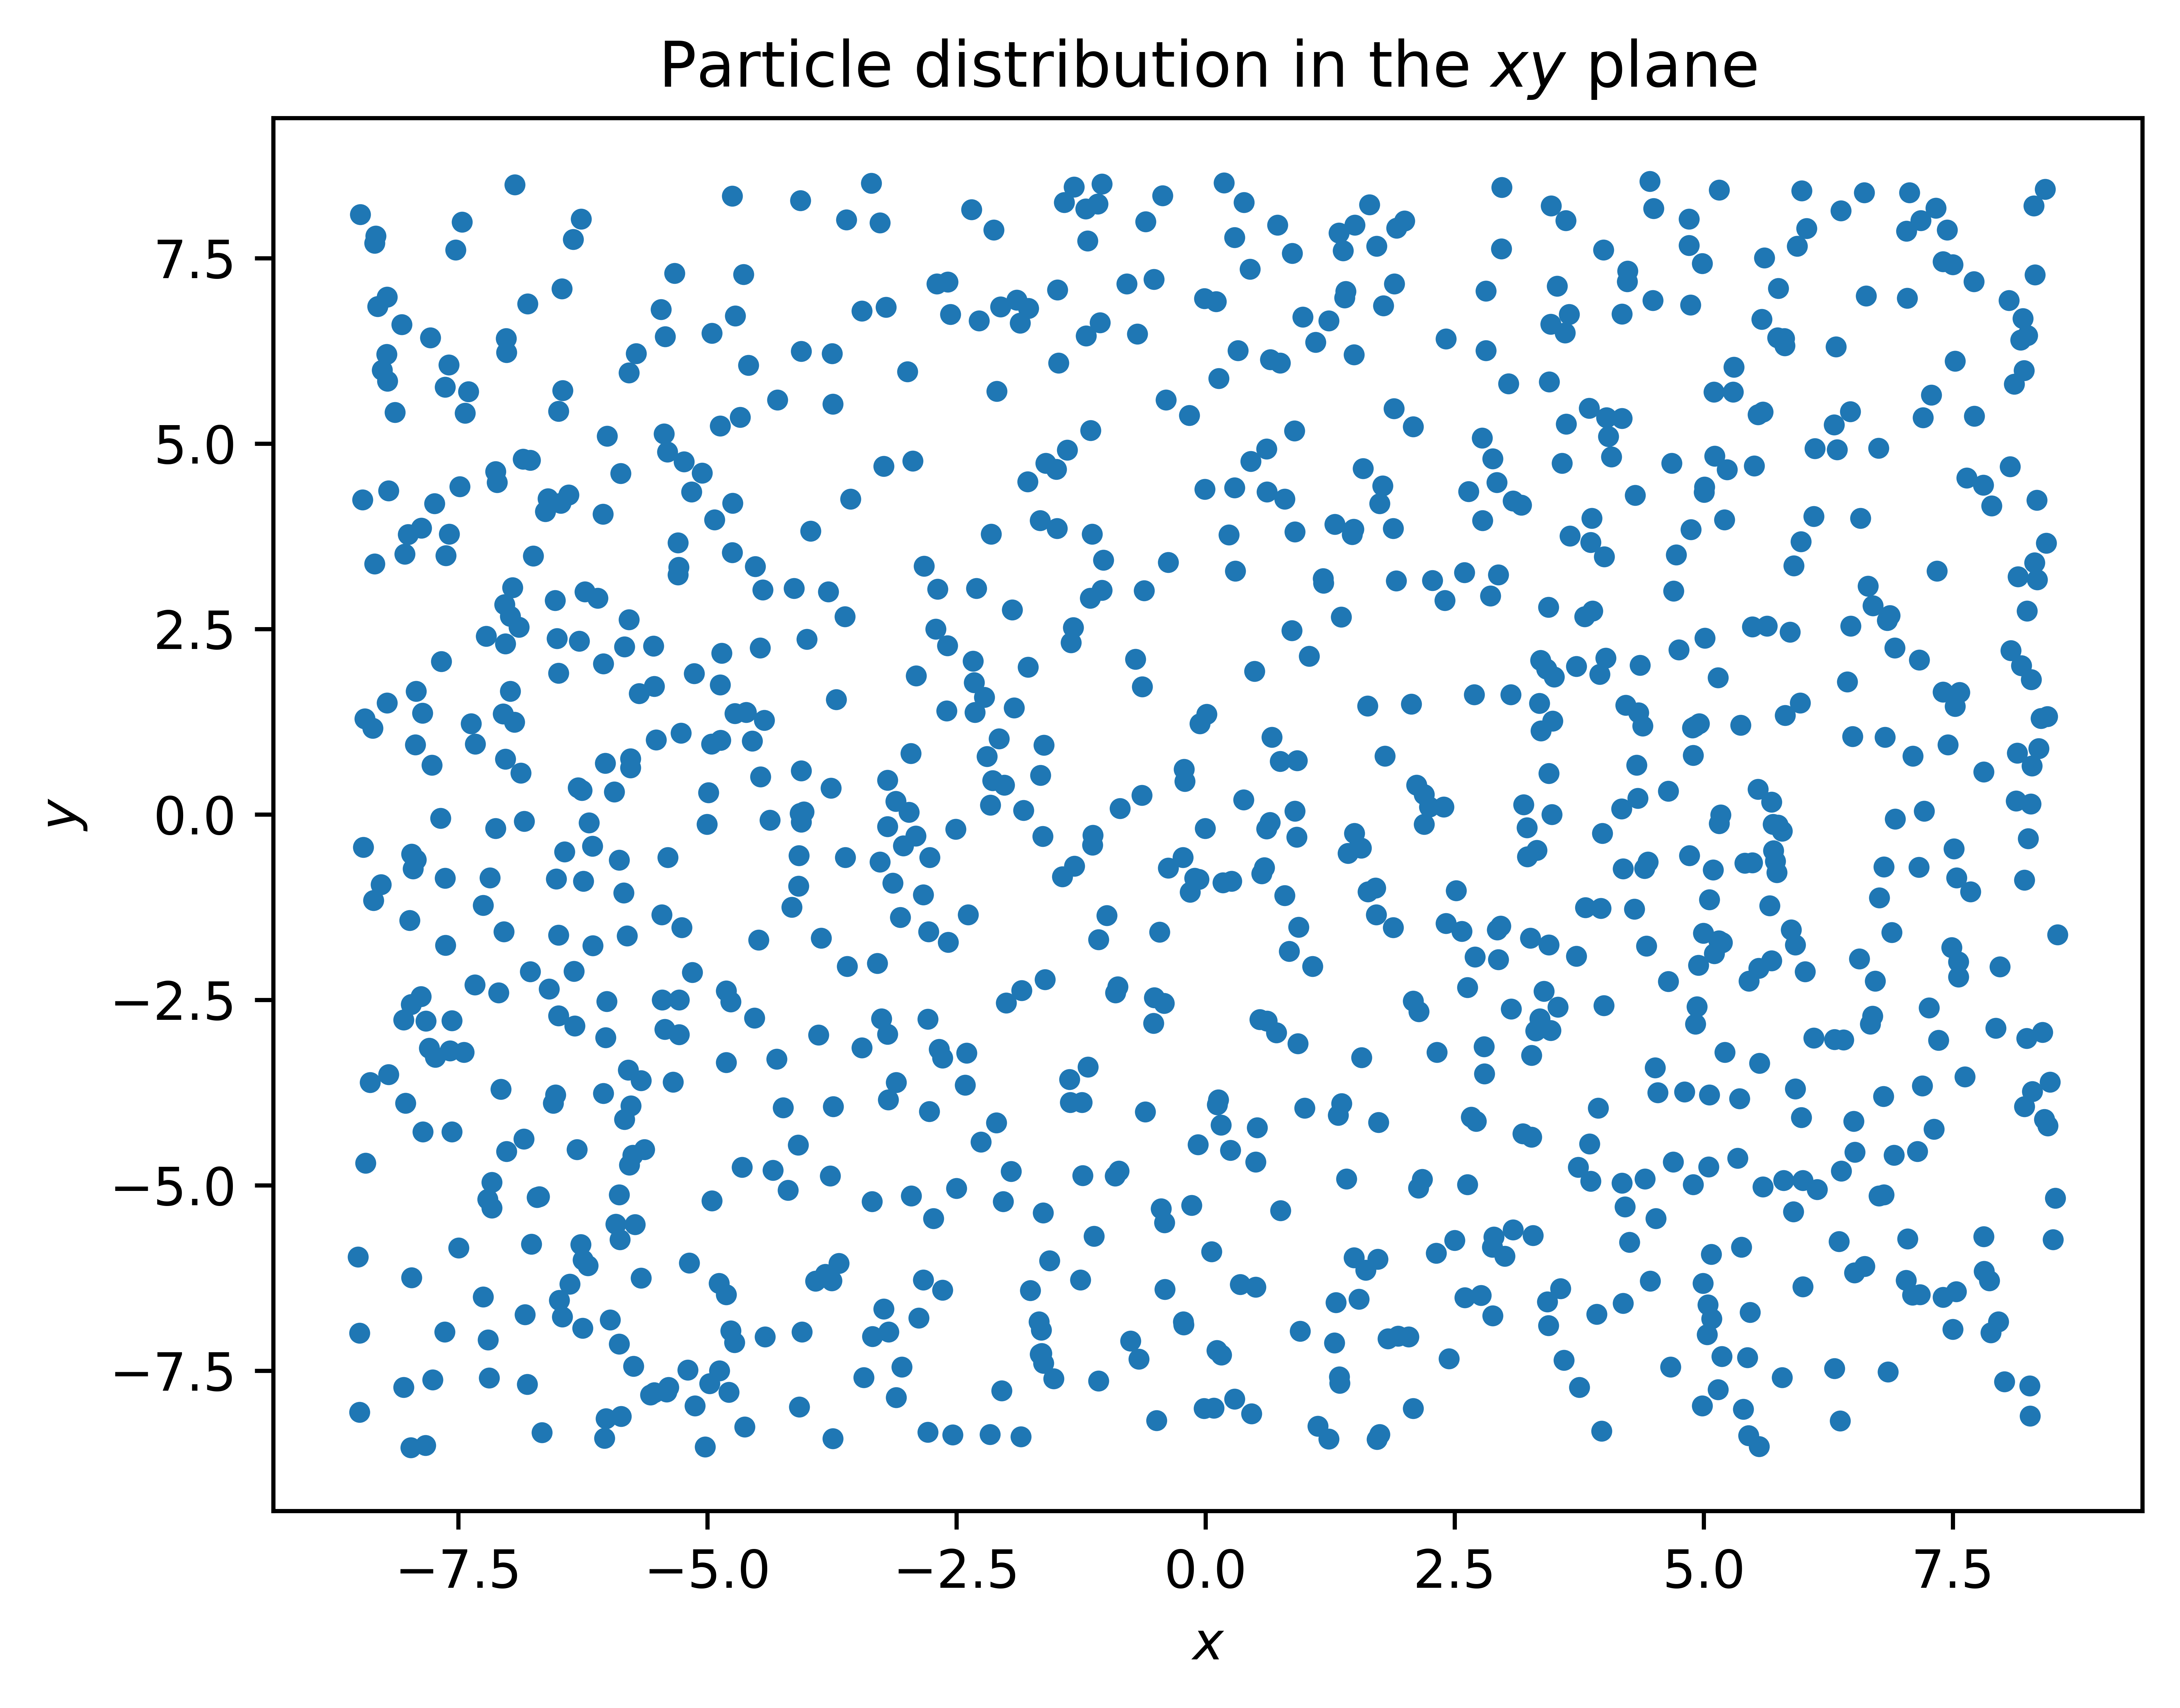

In [64]:
n, box, r, v = read_cnf_atoms ("cnf.out", with_v=True)
plt.figure(dpi=1000)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Particle distribution in the $xy$ plane")
#plt.savefig('MEstAv - Proyecto (10000 partículas) - 3.png') no guarda bien
plt.plot(r[:,0],r[:,1], '.', label='v')

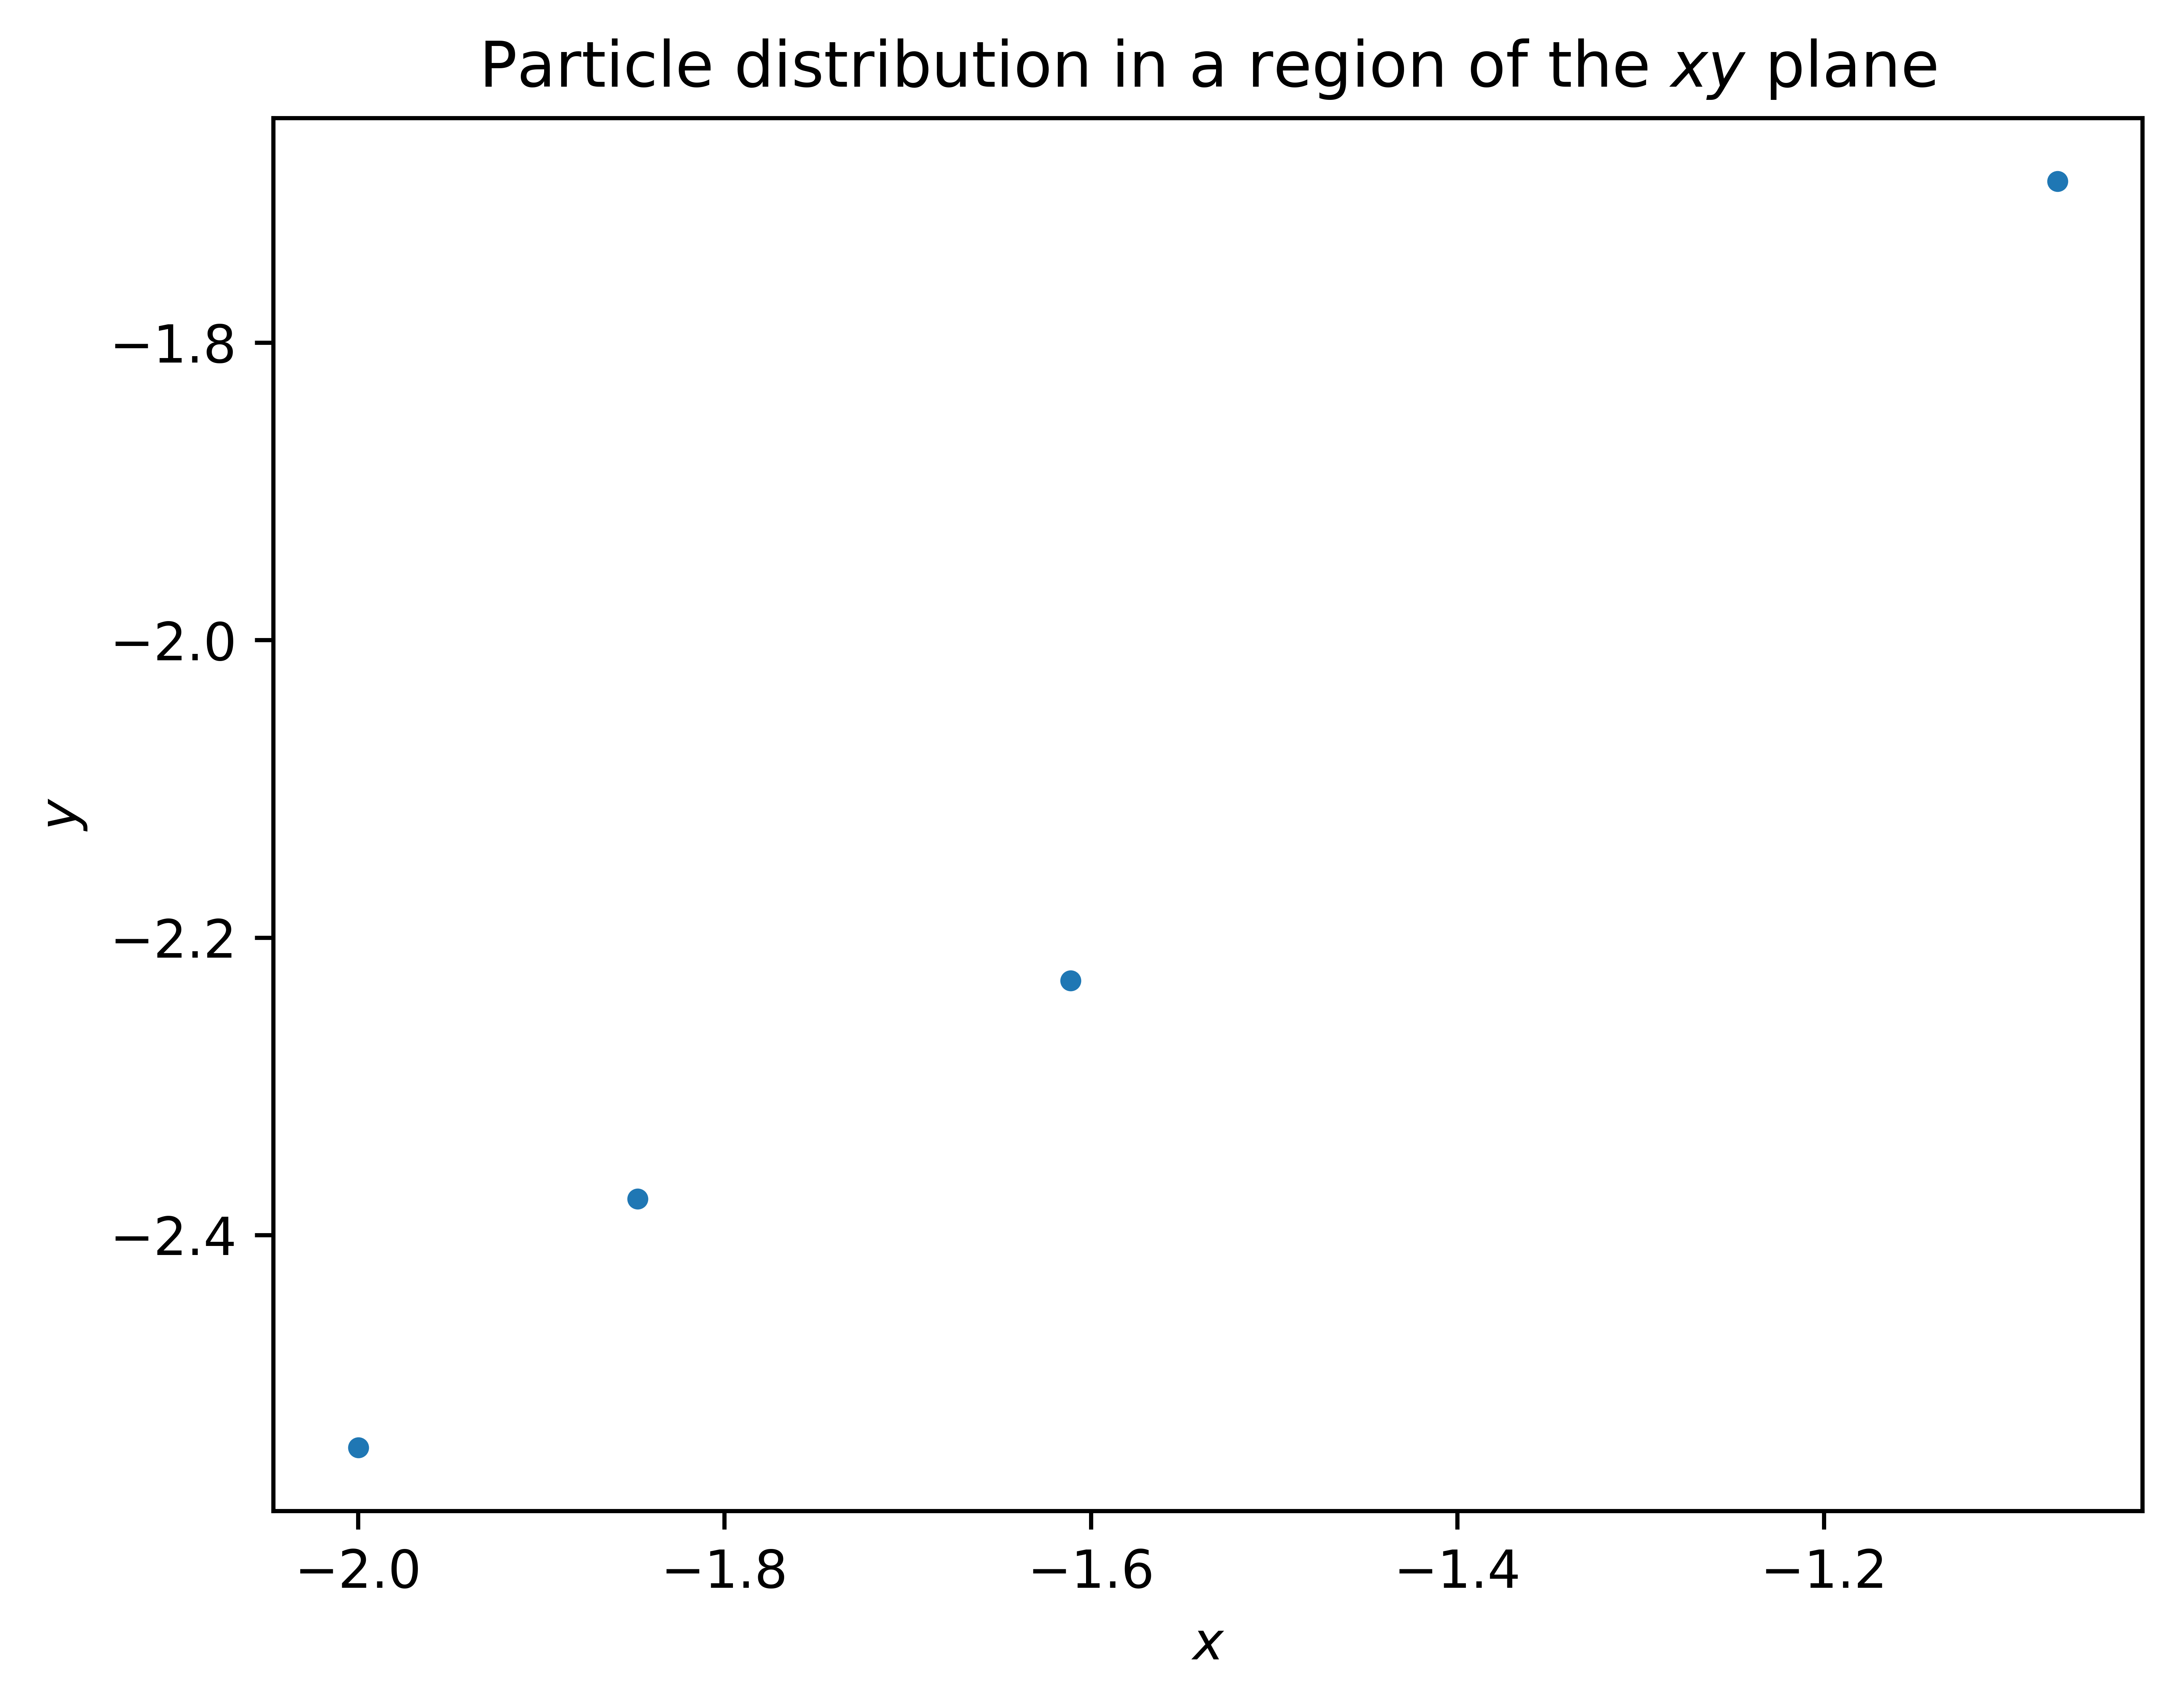

In [65]:
x_min, x_max = -2, -1
y_min, y_max = -3, -1

# Filter the data within the specified range
filtered_data = r[(r[:,0] >= x_min) & (r[:,0] <= x_max) & (r[:,1] >= y_min) & (r[:,1] <= y_max)]

# Extract the filtered x and y values
x_filtered = filtered_data[:, 0]
y_filtered = filtered_data[:, 1]

# Plot the filtered data
plt.figure(dpi=1000)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Particle distribution in a region of the $xy$ plane")
#plt.savefig('MEstAv - Proyecto (10000 partículas) - 4.png') No guarda bien
plt.plot(x_filtered, y_filtered, '.', label='v')